Rayleigh-Taylor instability
======

This notebook models the Rayleigh-Taylor instability outlined in Kaus *et al.* (2010). 

**Keywords:** Stress state, Free surface

**References**
1. Kaus, B. J., Mühlhaus, H., & May, D. A. (2010). A stabilization algorithm for geodynamic numerical simulations with a free surface. Physics of the Earth and Planetary Interiors, 181(1-2), 12-20.

![](./images/kaus2010RTI.gif)

In [1]:
from underworld import UWGeodynamics as GEO
from underworld import visualisation as vis

import underworld.function as fn
import math
import numpy as np

No module named 'lavavu' : module not found! disabling inline visualisation
loaded rc file /home/romain/PROJECTS/Project_underworld2/uw2_venv/lib/python3.10/site-packages/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

KL = 500 * u.kilometer
K_viscosity = 1e20  * u.pascal * u.second
K_density   = 3200 * u.kilogram / u.meter**3

KM = K_density * KL**3
Kt = KM/ ( KL * K_viscosity )

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM

In [3]:
Model = GEO.Model(elementRes=(50,50),
                  minCoord=(-250. * u.kilometer, -500. * u.kilometer),  
                  maxCoord=(250. * u.kilometer, 0. * u.kilometer),
                  gravity=(0.0, -9.81 * u.meter / u.second**2))

dt = 2.5*u.kiloyear
dt_str = "%.1f" %(dt.m)
checkpoint_interval = 1e2*u.kiloyear
fdir = "1_23_02_FreeSurface_Kaus2010_Rayleigh-Taylor_Instability_dt"+dt_str+"ka"
Model.outputDir = fdir

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50
In func WeightsCalculator_CalculateAll(): for swarm "KK2F3UT0__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "KK2F3UT0__swarm"


In [4]:
wavelength = GEO.nd(KL)
amplitude  = GEO.nd(5*u.kilometer)
offset     = GEO.nd(-100.*u.kilometer)
k = 2. * math.pi / wavelength

coord = fn.coord()
perturbationFn = offset + amplitude*fn.math.cos(k*coord[0])

lightShape = perturbationFn > coord[1] 
densShape  = perturbationFn <= coord[1]

densMaterial = Model.add_material(name="Dense Material", shape=densShape)
lightMaterial = Model.add_material(name="Light Material", shape=lightShape)

In [5]:
densMaterial.density  = 3300 * u.kilogram / u.metre**3
lightMaterial.density = 3200 * u.kilogram / u.metre**3

densMaterial.viscosity = 1e21 * u.pascal * u.second
lightMaterial.viscosity = 1e20 * u.pascal * u.second

In [7]:
npoints = 1000
coords = np.ndarray((npoints, 2))
coords[:, 0] = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), npoints)
coords[:, 1] = offset + amplitude*np.cos(k*coords[:, 0])

Model.add_passive_tracers(name="interface", vertices=coords)

In [8]:
Fig = vis.Figure(figsize=(500, 500))
Fig.Points(Model.interface_tracers, pointSize=5.0)
Fig.Points(Model.swarm, Model.materialField,pointSize=3.,colourBar=False)
Fig.Mesh(Model.mesh)
Fig.save("Fig_Kaus2010RTI_0.png")
Fig.show()

In [9]:
Model.set_velocityBCs(left=[0., None], right=[0., None], top=[None, None], bottom=[0.,0.])
Model.freeSurface = True

In [10]:
Model.run_for(5.5 * u.megayears, checkpoint_interval=checkpoint_interval,dt= dt)

Running with UWGeodynamics version 2.10.1-dev-dcb2ff4(development)
Options:  -Q22_pc_type uw -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-06 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Step:     1 Model Time: 2500.0 year dt: 2500.0 year (2021-09-28 12:43:09)
Step:     2 Model Time: 5000.0 year dt: 2500.0 year (2021-09-28 12:43:09)
Step:     3 Model Time: 7500.0 year dt: 2500.0 year (2021-09-28 12:43:09)
Step:     4 Model Time: 10000.0 year dt: 2500.0 year (2021-09-28 12:43:10)
Step:     5 Model Time: 12500.0 year dt: 2500.0 year (2021-09-28 12:43:10)
Step:     6 Model Time: 15000.0 year dt: 2500.0 year (2021-09-28 12:43:11)
Step:     7 Model Time: 17500.0 year dt: 2500.0 year (2021-09-28 12:43:11)
Step:     8 Model Time: 20000.0 year dt: 2500.0 year (2021-09-28 12:43:12)
Step:     9 Model Time: 22500.0 year dt: 2

Step:   105 Model Time: 262500.0 year dt: 2500.0 year (2021-09-28 12:44:07)
Step:   106 Model Time: 265000.0 year dt: 2500.0 year (2021-09-28 12:44:08)
Step:   107 Model Time: 267500.0 year dt: 2500.0 year (2021-09-28 12:44:08)
Step:   108 Model Time: 270000.0 year dt: 2500.0 year (2021-09-28 12:44:09)
Step:   109 Model Time: 272500.0 year dt: 2500.0 year (2021-09-28 12:44:09)
Step:   110 Model Time: 275000.0 year dt: 2500.0 year (2021-09-28 12:44:10)
Step:   111 Model Time: 277500.0 year dt: 2500.0 year (2021-09-28 12:44:10)
Step:   112 Model Time: 280000.0 year dt: 2500.0 year (2021-09-28 12:44:11)
Step:   113 Model Time: 282500.0 year dt: 2500.0 year (2021-09-28 12:44:11)
Step:   114 Model Time: 285000.0 year dt: 2500.0 year (2021-09-28 12:44:12)
Step:   115 Model Time: 287500.0 year dt: 2500.0 year (2021-09-28 12:44:12)
Step:   116 Model Time: 290000.0 year dt: 2500.0 year (2021-09-28 12:44:13)
Step:   117 Model Time: 292500.0 year dt: 2500.0 year (2021-09-28 12:44:13)
Step:   118 

Step:   213 Model Time: 532500.0 year dt: 2500.0 year (2021-09-28 12:45:09)
Step:   214 Model Time: 535000.0 year dt: 2500.0 year (2021-09-28 12:45:09)
Step:   215 Model Time: 537500.0 year dt: 2500.0 year (2021-09-28 12:45:10)
Step:   216 Model Time: 540000.0 year dt: 2500.0 year (2021-09-28 12:45:10)
Step:   217 Model Time: 542500.0 year dt: 2500.0 year (2021-09-28 12:45:11)
Step:   218 Model Time: 545000.0 year dt: 2500.0 year (2021-09-28 12:45:11)
Step:   219 Model Time: 547500.0 year dt: 2500.0 year (2021-09-28 12:45:12)
Step:   220 Model Time: 550000.0 year dt: 2500.0 year (2021-09-28 12:45:12)
Step:   221 Model Time: 552500.0 year dt: 2500.0 year (2021-09-28 12:45:13)
Step:   222 Model Time: 555000.0 year dt: 2500.0 year (2021-09-28 12:45:14)
Step:   223 Model Time: 557500.0 year dt: 2500.0 year (2021-09-28 12:45:14)
Step:   224 Model Time: 560000.0 year dt: 2500.0 year (2021-09-28 12:45:15)
Step:   225 Model Time: 562500.0 year dt: 2500.0 year (2021-09-28 12:45:15)
Step:   226 

Step:   321 Model Time: 802500.0 year dt: 2500.0 year (2021-09-28 12:46:13)
Step:   322 Model Time: 805000.0 year dt: 2500.0 year (2021-09-28 12:46:13)
Step:   323 Model Time: 807500.0 year dt: 2500.0 year (2021-09-28 12:46:14)
Step:   324 Model Time: 810000.0 year dt: 2500.0 year (2021-09-28 12:46:14)
Step:   325 Model Time: 812500.0 year dt: 2500.0 year (2021-09-28 12:46:15)
Step:   326 Model Time: 815000.0 year dt: 2500.0 year (2021-09-28 12:46:15)
Step:   327 Model Time: 817500.0 year dt: 2500.0 year (2021-09-28 12:46:16)
Step:   328 Model Time: 820000.0 year dt: 2500.0 year (2021-09-28 12:46:17)
Step:   329 Model Time: 822500.0 year dt: 2500.0 year (2021-09-28 12:46:17)
Step:   330 Model Time: 825000.0 year dt: 2500.0 year (2021-09-28 12:46:18)
Step:   331 Model Time: 827500.0 year dt: 2500.0 year (2021-09-28 12:46:18)
Step:   332 Model Time: 830000.0 year dt: 2500.0 year (2021-09-28 12:46:19)
Step:   333 Model Time: 832500.0 year dt: 2500.0 year (2021-09-28 12:46:19)
Step:   334 

Step:   430 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:18)
Step:   431 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:19)
Step:   432 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:20)
Step:   433 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:21)
Step:   434 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:22)
Step:   435 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:23)
Step:   436 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:24)
Step:   437 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:25)
Step:   438 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:26)
Step:   439 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:27)
Step:   440 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:31)
Step:   441 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:32)
Step:   442 Model Time: 1.1 megayear dt: 2500.0 year (2021-09-28 12:47:33)
Step:   443 Model Time: 1

Step:   540 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 12:49:15)
Step:   541 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 12:49:16)
Step:   542 Model Time: 1.3 megayear dt: 2500.0 year (2021-09-28 12:49:17)
Step:   543 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-28 12:49:18)
Step:   544 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-28 12:49:18)
Step:   545 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-28 12:49:19)
Step:   546 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-28 12:49:20)
Step:   547 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-28 12:49:21)
Step:   548 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-28 12:49:22)
Step:   549 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-28 12:49:23)
Step:   550 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-28 12:49:24)
Step:   551 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-28 12:49:24)
Step:   552 Model Time: 1.4 megayear dt: 2500.0 year (2021-09-28 12:49:25)
Step:   553 Model Time: 1

Step:   650 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:41)
Step:   651 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:42)
Step:   652 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:42)
Step:   653 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:43)
Step:   654 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:44)
Step:   655 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:44)
Step:   656 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:45)
Step:   657 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:45)
Step:   658 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:46)
Step:   659 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:46)
Step:   660 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:47)
Step:   661 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:48)
Step:   662 Model Time: 1.6 megayear dt: 2500.0 year (2021-09-28 12:50:49)
Step:   663 Model Time: 1

Step:   760 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:51:53)
Step:   761 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:51:54)
Step:   762 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:51:55)
Step:   763 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:51:55)
Step:   764 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:51:56)
Step:   765 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:51:57)
Step:   766 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:51:57)
Step:   767 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:51:58)
Step:   768 Model Time: 1.9 megayear dt: 0.2 second (2021-09-28 12:52:00)
Step:   769 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:52:01)
Step:   770 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:52:01)
Step:   771 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:52:02)
Step:   772 Model Time: 1.9 megayear dt: 2500.0 year (2021-09-28 12:52:02)
Step:   773 Model Time: 1.

Step:   870 Model Time: 2.1 megayear dt: 2500.0 year (2021-09-28 12:53:06)
Step:   871 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:07)
Step:   872 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:07)
Step:   873 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:08)
Step:   874 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:08)
Step:   875 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:09)
Step:   876 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:09)
Step:   877 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:10)
Step:   878 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:10)
Step:   879 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:11)
Step:   880 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:11)
Step:   881 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:12)
Step:   882 Model Time: 2.2 megayear dt: 2500.0 year (2021-09-28 12:53:13)
Step:   883 Model Time: 2

Step:   980 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:16)
Step:   981 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:17)
Step:   982 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:17)
Step:   983 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:18)
Step:   984 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:19)
Step:   985 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:19)
Step:   986 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:20)
Step:   987 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:21)
Step:   988 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:21)
Step:   989 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:22)
Step:   990 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:23)
Step:   991 Model Time: 2.4 megayear dt: 2500.0 year (2021-09-28 12:54:23)
Step:   992 Model Time: 2.5 megayear dt: 2500.0 year (2021-09-28 12:54:24)
Step:   993 Model Time: 2

Step:  1090 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:24)
Step:  1091 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:24)
Step:  1092 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:27)
Step:  1093 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:27)
Step:  1094 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:28)
Step:  1095 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:28)
Step:  1096 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:29)
Step:  1097 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:29)
Step:  1098 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:30)
Step:  1099 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:31)
Step:  1100 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:31)
Step:  1101 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:32)
Step:  1102 Model Time: 2.7 megayear dt: 2500.0 year (2021-09-28 12:55:32)
Step:  1103 Model Time: 2

Step:  1200 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:31)
Step:  1201 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:31)
Step:  1202 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:32)
Step:  1203 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:32)
Step:  1204 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:33)
Step:  1205 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:34)
Step:  1206 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:34)
Step:  1207 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:35)
Step:  1208 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:35)
Step:  1209 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:36)
Step:  1210 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:37)
Step:  1211 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:37)
Step:  1212 Model Time: 3.0 megayear dt: 2500.0 year (2021-09-28 12:56:40)
Step:  1213 Model Time: 3

Step:  1310 Model Time: 3.2 megayear dt: 2500.0 year (2021-09-28 12:57:42)
Step:  1311 Model Time: 3.2 megayear dt: 2500.0 year (2021-09-28 12:57:43)
Step:  1312 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:43)
Step:  1313 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:44)
Step:  1314 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:44)
Step:  1315 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:45)
Step:  1316 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:45)
Step:  1317 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:46)
Step:  1318 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:47)
Step:  1319 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:47)
Step:  1320 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:48)
Step:  1321 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:48)
Step:  1322 Model Time: 3.3 megayear dt: 2500.0 year (2021-09-28 12:57:49)
Step:  1323 Model Time: 3

Step:  1420 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:58:54)
Step:  1421 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:58:55)
Step:  1422 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:58:56)
Step:  1423 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:58:56)
Step:  1424 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:58:57)
Step:  1425 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:58:57)
Step:  1426 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:58:58)
Step:  1427 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:58:59)
Step:  1428 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:58:59)
Step:  1429 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:59:00)
Step:  1430 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:59:01)
Step:  1431 Model Time: 3.5 megayear dt: 2500.0 year (2021-09-28 12:59:01)
Step:  1432 Model Time: 3.6 megayear dt: 2500.0 year (2021-09-28 12:59:02)
Step:  1433 Model Time: 3

Step:  1530 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:05)
Step:  1531 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:06)
Step:  1532 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:08)
Step:  1533 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:09)
Step:  1534 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:09)
Step:  1535 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:10)
Step:  1536 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:11)
Step:  1537 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:11)
Step:  1538 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:12)
Step:  1539 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:13)
Step:  1540 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:13)
Step:  1541 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:14)
Step:  1542 Model Time: 3.8 megayear dt: 2500.0 year (2021-09-28 13:00:15)
Step:  1543 Model Time: 3

Step:  1640 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:23)
Step:  1641 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:24)
Step:  1642 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:25)
Step:  1643 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:26)
Step:  1644 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:27)
Step:  1645 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:28)
Step:  1646 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:28)
Step:  1647 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:29)
Step:  1648 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:30)
Step:  1649 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:31)
Step:  1650 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:31)
Step:  1651 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:32)
Step:  1652 Model Time: 4.1 megayear dt: 2500.0 year (2021-09-28 13:01:34)
Step:  1653 Model Time: 4

Step:  1750 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 13:02:37)
Step:  1751 Model Time: 4.3 megayear dt: 2500.0 year (2021-09-28 13:02:37)
Step:  1752 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:38)
Step:  1753 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:38)
Step:  1754 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:39)
Step:  1755 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:40)
Step:  1756 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:40)
Step:  1757 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:41)
Step:  1758 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:42)
Step:  1759 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:42)
Step:  1760 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:43)
Step:  1761 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:43)
Step:  1762 Model Time: 4.4 megayear dt: 2500.0 year (2021-09-28 13:02:44)
Step:  1763 Model Time: 4

Step:  1860 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:49)
Step:  1861 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:50)
Step:  1862 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:50)
Step:  1863 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:51)
Step:  1864 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:52)
Step:  1865 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:52)
Step:  1866 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:53)
Step:  1867 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:54)
Step:  1868 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:54)
Step:  1869 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:55)
Step:  1870 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:56)
Step:  1871 Model Time: 4.6 megayear dt: 2500.0 year (2021-09-28 13:03:56)
Step:  1872 Model Time: 4.7 megayear dt: 2500.0 year (2021-09-28 13:03:57)
Step:  1873 Model Time: 4

Step:  1970 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:24)
Step:  1971 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:25)
Step:  1972 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:27)
Step:  1973 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:28)
Step:  1974 Model Time: 4.9 megayear dt: 0.5 second (2021-09-28 13:05:32)
Step:  1975 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:33)
Step:  1976 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:34)
Step:  1977 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:35)
Step:  1978 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:36)
Step:  1979 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:37)
Step:  1980 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:38)
Step:  1981 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:39)
Step:  1982 Model Time: 4.9 megayear dt: 2500.0 year (2021-09-28 13:05:40)
Step:  1983 Model Time: 4.

Step:  2080 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:24)
Step:  2081 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:25)
Step:  2082 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:26)
Step:  2083 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:28)
Step:  2084 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:29)
Step:  2085 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:30)
Step:  2086 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:31)
Step:  2087 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:32)
Step:  2088 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:33)
Step:  2089 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:34)
Step:  2090 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:35)
Step:  2091 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:36)
Step:  2092 Model Time: 5.2 megayear dt: 2500.0 year (2021-09-28 13:07:38)
Step:  2093 Model Time: 5

Step:  2190 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 13:09:50)
Step:  2191 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 13:09:51)
Step:  2192 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 13:09:53)
Step:  2193 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 13:09:55)
Step:  2194 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 13:09:56)
Step:  2195 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 13:09:57)
Step:  2196 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 13:09:58)
Step:  2197 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 13:09:59)
Step:  2198 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 13:10:01)
Step:  2199 Model Time: 5.4 megayear dt: 2500.0 year (2021-09-28 13:10:03)
Step:  2200 Model Time: 5.5 megayear dt: 2500.0 year (2021-09-28 13:10:04)
Step:  2201 Model Time: 5.5 megayear dt: 2500.0 year (2021-09-28 13:10:05)
Step:  2202 Model Time: 5.5 megayear dt: 2500.0 year (2021-09-28 13:10:07)
Step:  2203 Model Time: 5

1


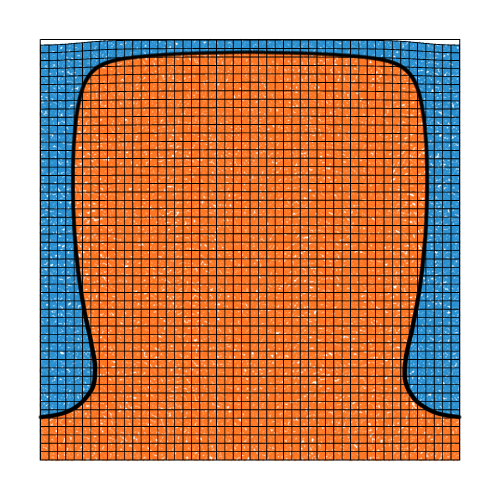

In [11]:
Fig.save("Fig_Kaus2010RTI_1.png")
Fig.show()

In [17]:
import h5py   
import matplotlib.pyplot as plt
import numpy as np
import math

def load_surf_swarm(fdir,step):
    fname = fdir+"interface-"+str(step)+".h5"
    fh5   = h5py.File(fname ,'r')  
    fdata = fh5["data"][()]
    xcoord = fdata[:,0]
    ycoord = fdata[:,1]
    return xcoord,ycoord

def load_depth(fdir,maxstep,dstep):
    depth_l = []
    depth_r = []
    for step in range(0,maxstep+1,dstep):
        xcoord,ycoord = load_surf_swarm(fdir,step)
        depth_l.append(ycoord[0])   
        depth_r.append(ycoord[-1])  
    return np.array(depth_l),np.array(depth_r)

In [18]:
dt0,maxsteps0,dstep0,= 100,54,1
times0 = np.arange(0,dt0*maxsteps0+dt0*dstep0/2,dt0*dstep0)

fdir += "/"
depth0_l,depth0_r = load_depth(fdir,maxsteps0,dstep0)

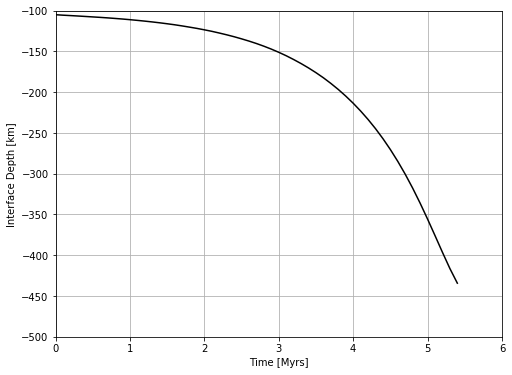

In [19]:
# Fig 3 in Kaus et al., 2010

fname = "Depth of the interface at x=−250km versus time for the free surface simulations"
fig, ax1 = plt.subplots(nrows=1, figsize=(8,6))
ax1.set(xlabel='Time [Myrs]', ylabel='Interface Depth [km]') 
ax1.plot(times0/1000,depth0_l,'-k')
ax1.set_ylim([-500,-100])
ax1.set_xlim([0,6])
ax1.grid()
#ax1.legend(loc = 'lower right',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight')